# 04 - Gabarito - RegLin e RegLog

###  

### Exercícios - Regressão Logística

In [1]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

**1)** [COVID](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv): Esses dados estão no dataset *COVID.csv* e nele encontramos alguns dados sobre os casos de Covid no México, onde têm os sintomas e caractéristicas dos pacientes além do resultado do teste para Covid.

A descrição das variáveis estão indicadas abaixo:<br>
 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>

In [2]:
# Importe dos dados pelo CSV
covid = pd.read_csv('./datasets/COVID.csv', index_col=0)

In [3]:
# Olhando a base de dados
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [4]:
# Verificando o shape dos dados
covid.shape

(499692, 19)

In [5]:
# Verificando dados faltantes
covid.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

In [6]:
# Dados faltantes em percentual
(covid.isna().sum()/len(covid))*100

sex                     0.000000
patient_type            0.000000
intubed                78.501957
pneumonia               0.002201
age                     0.000000
pregnancy              50.918166
diabetes                0.328402
copd                    0.289378
asthma                  0.288578
inmsupr                 0.332605
hypertension            0.297984
other_disease           0.438870
cardiovascular          0.301986
obesity                 0.294181
renal_chronic           0.295382
tobacco                 0.315995
contact_other_covid    30.753944
covid_res               0.000000
icu                    78.502157
dtype: float64

In [7]:
# Separando o dataframe por sexo
covid_male = covid[covid['sex'] == 0]
covid_female = covid[covid['sex'] == 1]

In [8]:
# Shape do covid_male
covid_male.shape

(253098, 19)

In [9]:
# Shape do covid_female
covid_female.shape

(246594, 19)

In [10]:
# Dados faltantes para o covid_male
covid_male.isna().sum()/len(covid_male)*100

sex                      0.000000
patient_type             0.000000
intubed                 74.516590
pneumonia                0.002371
age                      0.000000
pregnancy              100.000000
diabetes                 0.386016
copd                     0.347691
asthma                   0.341765
inmsupr                  0.384041
hypertension             0.356779
other_disease            0.507708
cardiovascular           0.357964
obesity                  0.348482
renal_chronic            0.351247
tobacco                  0.379695
contact_other_covid     30.619760
covid_res                0.000000
icu                     74.516590
dtype: float64

In [11]:
# Dados faltantes para o covid_female
covid_female.isna().sum()/len(covid_female)*100

sex                     0.000000
patient_type            0.000000
intubed                82.592439
pneumonia               0.002028
age                     0.000000
pregnancy               0.541781
diabetes                0.269269
copd                    0.229527
asthma                  0.233988
inmsupr                 0.279812
hypertension            0.237638
other_disease           0.368217
cardiovascular          0.244531
obesity                 0.238449
renal_chronic           0.238043
tobacco                 0.250614
contact_other_covid    30.891668
covid_res               0.000000
icu                    82.592845
dtype: float64

In [12]:
# Estratégia de preenchimento do covid_male
for col in covid_male.columns:
    if col == 'pregnancy':
        covid_male[col].fillna(0, inplace=True) 
    else:
        covid_male[col].fillna(covid_male[col].mode()[0], inplace=True)

C:\Users\sandro.saorin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
# Estratégia de preenchimento do covid_female
for col in covid_female.columns:
    covid_female[col].fillna(covid_female[col].mode()[0], inplace=True)

In [14]:
# Reavaliando os dados faltantes covid_male
covid_male.isna().sum()/len(covid_male)*100

sex                    0.0
patient_type           0.0
intubed                0.0
pneumonia              0.0
age                    0.0
pregnancy              0.0
diabetes               0.0
copd                   0.0
asthma                 0.0
inmsupr                0.0
hypertension           0.0
other_disease          0.0
cardiovascular         0.0
obesity                0.0
renal_chronic          0.0
tobacco                0.0
contact_other_covid    0.0
covid_res              0.0
icu                    0.0
dtype: float64

In [15]:
# Reavaliando os dados faltantes covid_female
covid_female.isna().sum()/len(covid_female)*100

sex                    0.0
patient_type           0.0
intubed                0.0
pneumonia              0.0
age                    0.0
pregnancy              0.0
diabetes               0.0
copd                   0.0
asthma                 0.0
inmsupr                0.0
hypertension           0.0
other_disease          0.0
cardiovascular         0.0
obesity                0.0
renal_chronic          0.0
tobacco                0.0
contact_other_covid    0.0
covid_res              0.0
icu                    0.0
dtype: float64

In [16]:
# Juntando em uma base só novamente
covid_clean = pd.concat([covid_male, covid_female])

In [17]:
# Verificando problemas no join
covid_clean.shape

(499692, 19)

In [18]:
# Olhando para os dados
covid_clean.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
5,0,0,0.0,1.0,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0
6,0,0,0.0,0.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [19]:
# Reordenar os dados pelo index
covid_clean.sort_index(inplace=True)
covid_clean.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0


In [20]:
# Speara os dados em X e Y
X = covid_clean.drop(['covid_res'], axis=1)
y = covid_clean['covid_res']

In [21]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
# Instancia a normalização
scaler = StandardScaler()

In [ ]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
# Instancia o modelo
model = LogisticRegression(max_iter = 1000)

In [23]:
# Fit do modelo
model.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Gera o predict
y_pred = model.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

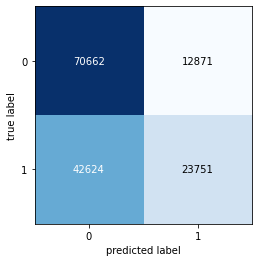

In [25]:
# gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [26]:
# Print do Classification report
print(classification_report(y_test, y_pred))

Acurácia:  0.629806281185794
Precision:  0.6485445906831959
Recall:  0.35783050847457626
F1-Score:  0.46119789896793106


# Escolha de Threshold

In [27]:
# Criando o predict proba para a base de teste
y_proba_test = model.predict_proba(X_test_std)
y_proba_test

array([[0.57457861, 0.42542139],
       [0.62619628, 0.37380372],
       [0.56065392, 0.43934608],
       ...,
       [0.51946827, 0.48053173],
       [0.45358137, 0.54641863],
       [0.72356751, 0.27643249]])

In [29]:
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [30]:
#Criando um dataframe com a probabilidade da classe 1 e a marcação de target
results_test.head()

,covid_res,proba
373402,0,0.425
181022,1,0.374
317841,0,0.439
272745,0,0.362
153280,1,0.593


In [31]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [32]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 

<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 

0.96 0.98 1.0 

<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
<ipython-input-32-6bae3eeb6b9f>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-32-6bae3eeb6b9f>:32: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = np.where((precision + recall) > 0, (2 

In [33]:
# tabela de Thresholds
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
1,0.04,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
2,0.06,3,0,83530,66375,0.4428,1.0000,0.4428,0.6138
3,0.08,11,5,83522,66370,0.4428,0.9999,0.4428,0.6138
4,0.10,15,7,83518,66368,0.4428,0.9999,0.4428,0.6138
5,0.12,21,8,83512,66367,0.4428,0.9999,0.4429,0.6138
6,0.14,29,11,83504,66364,0.4428,0.9998,0.4429,0.6138
7,0.16,69,26,83464,66349,0.4429,0.9996,0.4431,0.6138
8,0.18,121,48,83412,66327,0.4430,0.9993,0.4433,0.6138
9,0.20,250,87,83283,66288,0.4432,0.9987,0.4439,0.6139


Text(0.5, 1.0, 'Precision and Recall')

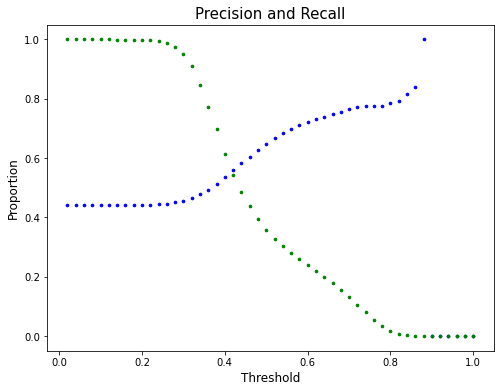

In [34]:
# Precison-Recall-Threshold Curve

k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.title("Precision and Recall", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

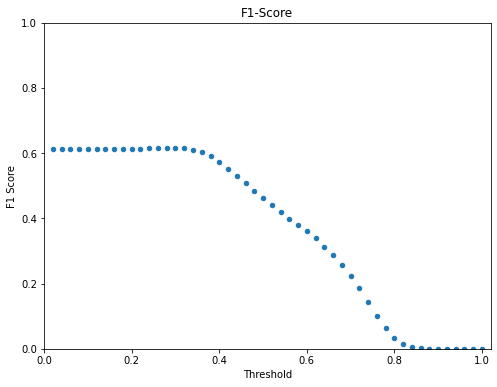

In [35]:
# F1-Score Curve

grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))


In [36]:
# Cria o predict usando um novo threshold

y_pred2 = np.where(y_proba_test[:,1] >= 0.3, 1, 0)
y_pred2

array([1, 1, 1, ..., 1, 1, 0])

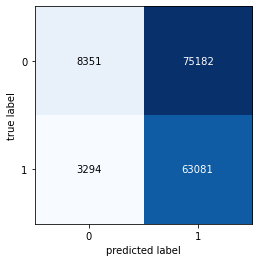

In [37]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [38]:
# Print do classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.10      0.18     83533
           1       0.46      0.95      0.62     66375

    accuracy                           0.48    149908
   macro avg       0.59      0.53      0.40    149908
weighted avg       0.60      0.48      0.37    149908



**2)** [Admissão em Faculdades para Estudantes Indianos](https://www.kaggle.com/mohansacharya/graduate-admissions): Esses dados estão no dataset *Admission_Predict.csv* e nele encontramos alguns dados sobre estudantes indianos que tem interesse em ingressar na Universidade. As variáveis que estão disponíveis são:

- GRE Scores
- TOEFL Scores
- University Rating
- SOP: Statement of Purpose 
- LOR: Letter of Recommendation Strength
- CGPA: Undergraduate GPA
- Research Experience
- Chance of Admit

**DICA:** Vocês irão perceber que o valor da target 'Chance of Admit ' não vai estar em binário, para transformar os dados vocês podem utilizar a função [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) com um threshold de 0.5

In [ ]:
# Carrega os dados pelo CSV
grades = pd.read_csv('Admission_Predict.csv')

In [ ]:
# Print dos primeiros dados do DataFrame
grades.head()

In [ ]:
# Principais estatisticas do dataset
grades.describe()

In [ ]:
# Avaliando a distribuição das notas dos alunos
sns.distplot(grades['Chance of Admit '])
plt.show()

**Ponto Importante deste exercício!:** Repare que a média das notas de aprovações dos alunos é muito mais alta que o valor default da Regressão Logística de 0,5. Por isso devemos colocar um threshold de 0,7 para sim equilibrar a nossa base:

In [ ]:
# Modifica a variável target
grades['Chance of Admit '] = np.where(grades['Chance of Admit '] >= 0.7, 1, 0)

In [ ]:
# Separa os dados em X e Y
X = grades.drop(['Chance of Admit '], axis = 1)
y = grades['Chance of Admit ']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
# Instancia a normalização
scaler = StandardScaler()

In [ ]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
# Instancia o modelo
model = LogisticRegression()

In [23]:
# Fit do modelo
model.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Gera o predict
y_pred = model.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
#Print do classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Plot da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

**3)** Dataset Iris: Dataset bem conhecido a respeito de 3 tipos da Iris, onde no dataset *Iris.csv* temos alguns dados sobre caractéristicas da flor e a marcação da *species*

In [ ]:
# Carrega os dados pelo CSV
iris = pd.read_csv('iris.csv')

In [ ]:
# Print dos primeiros dados
iris.head()

In [ ]:
# Pairplot das variaveis
sns.pairplot(iris, hue='species')

In [ ]:
# Speara os dados em X e Y
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [ ]:
# Separa os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
# Instancia a normalização
scaler = StandardScaler()

In [ ]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# instancia o Modelo
model = LogisticRegression()

In [ ]:
# Fit do Modelo
model.fit(X_train_std, y_train)

In [ ]:
# Gera os predicts
y_pred = model.predict(X_test_std)

In [ ]:
# print do classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

## 

### Regressão Linear

__1)__ O arquivo fish.csv consiste em um dataset com registro de características de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, um modelo de Regressão Linear para estimar o peso (Weight) dos peixes.

Não esqueça de explorar os dados, realizar o tratamento dos dados (analise o tipo dos dados, por exemplo), fazer a separação dos dados de treino e teste; e, por fim, avaliar a precisão do seu modelo.

In [ ]:
# Carrega os dados sobre os peixes
fishs = pd.read_csv('Fish.csv')

In [ ]:
# Print dos primeiros dados
fishs.head()

In [ ]:
# Dimensões da Base
fishs.shape

In [ ]:
# Proporção das espécies
fishs['Species'].value_counts()

In [ ]:
# PAlicao get dummies
fishs_with_dummies = pd.get_dummies(fishs, 
                                    prefix_sep='_', 
                                    columns=['Species'], 
                                    drop_first = True)
fishs_with_dummies.head()

In [ ]:
# Separa os dados entre X e y
X = fishs_with_dummies.drop(['Weight'], axis = 1)
y = fishs_with_dummies['Weight']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Instancia a normalização
scaler = StandardScaler()

In [ ]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()

In [ ]:
# Fit do modelo
model.fit(X_train_std, y_train)

In [ ]:
# Gera os predicts
y_pred = model.predict(X_test_std)

In [ ]:
# Plot da comparação do Predito pelo Real
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
# Calcula o R2
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

__2)__ O arquivo usa_housing.csv consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

- __Avg. Area Income:__ Média da renda dos residentes de onde a casa está localizada.
- __Avg. Area House Age:__ Média de idade das casas da mesma cidade.
- __Avg. Area Number of Rooms:__ Número médio de quartos para casas na mesma cidade.
- __Avg. Area Number of Bedrooms:__ Número médio de quartos para casas na mesma cidade.
- __Area Population:__ A população da cidade onde a casa está localizada.
- __Price:__ Preço de venda da casa.
- __Address:__ Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

In [ ]:
# Carrega os dados o CSV
houses = pd.read_csv('usa_housing.csv')

In [ ]:
# Print dos primeiros dados
houses.head()

In [ ]:
# Remover os dados sobre endereços
houses_clean = houses.drop(['Address'], axis = 1)

In [ ]:
# Separa os dados em X e y
X = houses_clean.drop(['Price'], axis = 1)
y = houses_clean['Price']

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Instancia a normalização
scaler = StandardScaler()

In [ ]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instancia o modelo
model = LinearRegression()

In [ ]:
# Fit do modelo
model.fit(X_train_std, y_train)

In [ ]:
# Gera os predicts
y_pred = model.predict(X_test_std)

In [ ]:
# Plot da comparação do Predito pelo Real
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
# Calcula o R2
R2 = r2_score(y_test, y_pred)
print('R2:', R2)